# Analyze pendulum data
Use this notebook to quickly test whether your pendulum data makes sense!

In [1]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
from iminuit import Minuit
from scipy import stats

In [2]:
# Example file location
filename_example = 'data_pendulum_example/timer_output_31meas.dat'

## Data reader

In [3]:
# Read in data
def read_data(filename):
    dat = np.genfromtxt(filename, delimiter='\t', names=('n', 't_s'))
    return dat

## Read and plot the data

7.20950150537311 7.516306562847453
1.0
[-0.20635333 -0.28890667 -0.29736    -0.27421333 -0.21906667 -0.19622
 -0.19687333 -0.22152667 -0.23038    -0.19923333 -0.20798667 -0.24094
 -0.18569333 -0.16254667 -0.2033     -0.15615333 -0.15680667  0.15204
 -0.10251333 -0.07946667 -0.09552    -0.10517333 -0.07402667 -0.08288
  0.02056667 -0.02848667  0.24276    -0.03009333  0.04095333  0.        ]


[(0.0, 31.0), (0.0, 232.5617)]

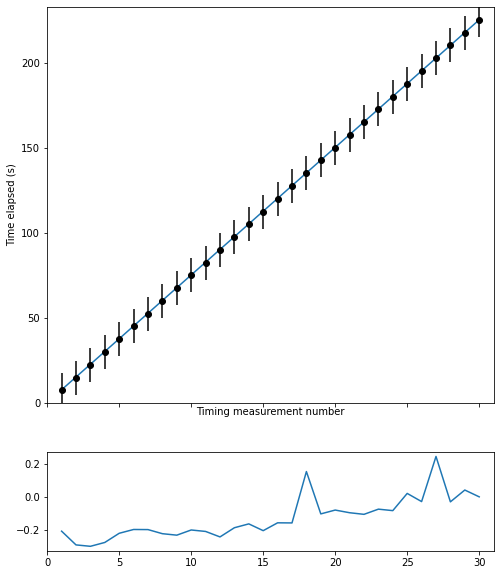

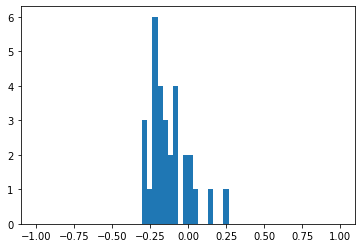

In [42]:
data_example = read_data(filename_example)
n, t = data_example['n'], data_example['t_s']

# Plotting
sig_t = 10.0     # Set your own values...
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(8, 10),
                       gridspec_kw={'height_ratios':[4,1]}, sharex=True)

fig1,ax1 = plt.subplots(nrows = 1, ncols =1)

m1 = t[-1]/len(n)
fit_mx = []

for i in range(len(n)):
    fit_mx.append(m1*n[i])
    
x = np.arange(len(n))

def fit_funct(x, alpha0, alpha1):
    return alpha0 + alpha1*x
def chi2_own(alpha0, alpha1):
    y_fit = fit_funct(x, alpha0, alpha1)
    chi2 = np.sum(((t-y_fit)/sig_t)**2)
    return chi2

chi2_own.errordef = 1.0
minuit = Minuit(chi2_own,alpha0 = 0.0, alpha1 = 7.5)
minuit.migrad()
alpha0_fit = minuit.values['alpha0']
alpha1_fit = minuit.values['alpha1']
erroralpha0_fit = minuit.errors['alpha0']
erroralpha1_fit = minuit.errors['alpha1']
Nvar = 1
Npoints = len(t)
Ndof = Npoints - Nvar
Chi2_fit = minuit.fval
Prob_fit = stats.chi2.sf(Chi2_fit, Ndof)
print(alpha0_fit, alpha1_fit)
print(Prob_fit)

residual = t - fit_mx

print(residual[:])


ax[0].errorbar(n, t, yerr=sig_t, color='k', fmt='o')
ax[0].plot(n, fit_mx)
ax[1].plot(n, residual)
ax1.hist(residual, bins = 60, range = (-1.0, 1.0))
ax[0].set_xlabel('Timing measurement number')
ax[0].set_ylabel('Time elapsed (s)')
ax[0].set(xlim=(0, n[-1]+np.ediff1d(n)[0]), ylim=(0, t[-1]+np.ediff1d(t)[0]))


# What to do next?

The reason for the (empty) plot below is, that though your data (hopefully) lies on a line, you're not able to see any smaller effects. However, if you plot the __residuals__ (the difference between your measurements and a fit to them), then you will much better be able to tell, if the data looks good. Also, it is from a historgram of the residuals, that you can determine, if your errors are Gaussian (or have any obvious outliers), and from the Standard Deviation what your (typical) uncertainty is.

In [5]:
from IPython.core.display import Latex

def lprint(*args,**kwargs):
    """Pretty print arguments as LaTeX using IPython display system 
    
    Parameters
    ----------
    args : tuple 
        What to print (in LaTeX math mode)
    kwargs : dict 
        optional keywords to pass to `display` 
    """
    display(Latex('$$'+' '.join(args)+'$$'),**kwargs)

In [6]:
from sympy import *

g, L , T = symbols("g, L, T")
dg, dL, dT = symbols("sigma_g, sigma_L, sigma_T")

g = L * (2*pi / T)**2
dg = sqrt((g.diff(L) * dL)**2 + (g.diff(T) * dT)**2)
lprint(latex(Eq(symbols('g'),g)))
lprint(latex(Eq(symbols('sigma_g'), dg)))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>